Introduction to Network Analysis in Python using networkx

Import the library

In [1]:
import networkx as nx

we want to use football network data preserved on http://www-personal.umich.edu/~mejn/netdata/football.zip

The dataset is a network of American football games between Division IA colleges during regular season Fall 2000.

The relation stored in this dataset indicates which conference they are playing

In [12]:
# we want to use football network data preserved on http://www-personal.umich.edu/~mejn/netdata/football.zip
!wget http://www-personal.umich.edu/~mejn/netdata/football.zip

--2019-01-24 13:40:32--  http://www-personal.umich.edu/~mejn/netdata/football.zip
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4409 (4.3K) [application/zip]
Saving to: ‘football.zip’

football.zip        100%[===================>]   4.31K  --.-KB/s    in 0.01s   

2019-01-24 13:40:32 (438 KB/s) - ‘football.zip’ saved [4409/4409]



unzip the file using unzip command

In [13]:
!unzip football.zip

Archive:  football.zip
  inflating: football.gml            
  inflating: football.txt            


Data saved using gml format, network x has feature to read the gml using read_gml, this function will return a network graph object.

We assign the network football graph to a variable for further analysis

In [16]:
football_graph = nx.read_gml("football.gml")

## method: .nodes()

Look at the nodes stored on the graph

In [66]:
pd.DataFrame(list(football_graph.nodes())).head(10)

,0
0,California
1,Arkansas
2,SouthernMethodist
3,TexasElPaso
4,Virginia
5,Colorado
6,FloridaState
7,NorthernIllinois
8,Purdue
9,NorthCarolinaState


## method: .edges()

Look at the edges stored on the graph

In [65]:
pd.DataFrame(list(football_graph.edges())).head(10)

,0,1
0,California,OregonState
1,California,UCLA
2,California,Utah
3,California,ArizonaState
4,California,Oregon
5,California,Washington
6,California,SouthernCalifornia
7,California,WashingtonState
8,California,FresnoState
9,California,Stanford


# Draw graph

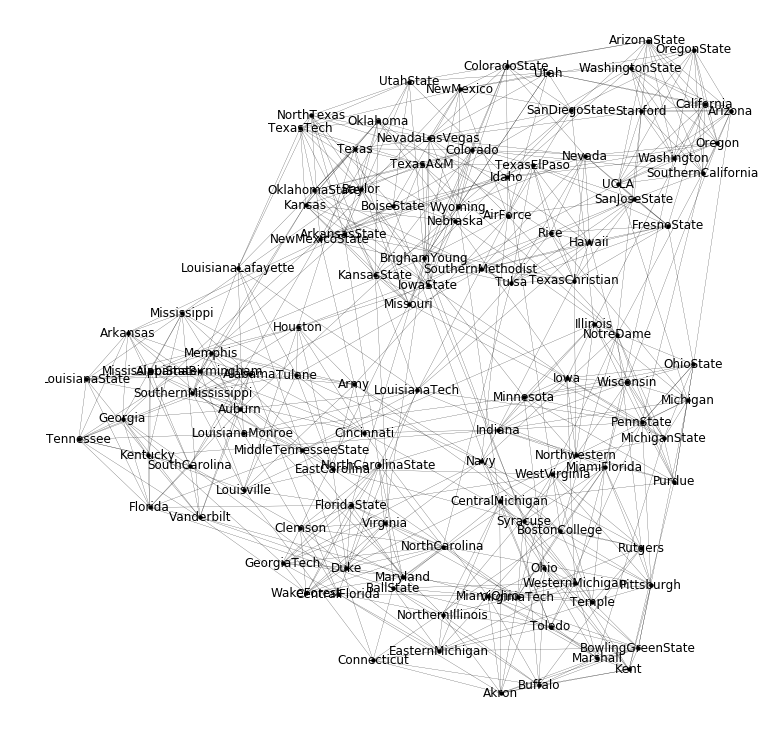

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

options = {
    'node_color': 'black',
    'node_size': 20,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.2,
}
plt.figure(figsize=(10,10))

nx.draw(football_graph, with_labels=True, **options)
plt.show()

## Centrality measurement

Centrality measurement module can be called using nx.centrality.[centrality_function]

In [31]:
# betweeness centrality
nx.centrality.betweenness_centrality(football_graph)

{'AirForce': 0.013952929320212783,
 'Akron': 0.00849294611602445,
 'Alabama': 0.023046321730608006,
 'AlabamaBirmingham': 0.011581581298031529,
 'Arizona': 0.006732525804006759,
 'ArizonaState': 0.005008648931669308,
 'Arkansas': 0.0064981105526952,
 'ArkansasState': 0.020700224631586835,
 'Army': 0.016539482936742633,
 'Auburn': 0.01660199660390932,
 'BallState': 0.01700336998667973,
 'Baylor': 0.006907991485590173,
 'BoiseState': 0.018172058273593233,
 'BostonCollege': 0.009028716823683688,
 'BowlingGreenState': 0.00841756267007742,
 'BrighamYoung': 0.03248994918389483,
 'Buffalo': 0.00802592497662836,
 'California': 0.007515885504833704,
 'CentralFlorida': 0.013206024770572686,
 'CentralMichigan': 0.025186801970868828,
 'Cincinnati': 0.02383635493910067,
 'Clemson': 0.013536271209453077,
 'Colorado': 0.013982681992917627,
 'ColoradoState': 0.006438559060854568,
 'Connecticut': 0.007789504694591863,
 'Duke': 0.011443177305595336,
 'EastCarolina': 0.014372451528538928,
 'EasternMichig

In [34]:
# degree centrality
nx.centrality.degree_centrality(football_graph)

{'AirForce': 0.08771929824561403,
 'Akron': 0.09649122807017543,
 'Alabama': 0.09649122807017543,
 'AlabamaBirmingham': 0.08771929824561403,
 'Arizona': 0.09649122807017543,
 'ArizonaState': 0.09649122807017543,
 'Arkansas': 0.08771929824561403,
 'ArkansasState': 0.08771929824561403,
 'Army': 0.09649122807017543,
 'Auburn': 0.09649122807017543,
 'BallState': 0.08771929824561403,
 'Baylor': 0.08771929824561403,
 'BoiseState': 0.07894736842105263,
 'BostonCollege': 0.09649122807017543,
 'BowlingGreenState': 0.09649122807017543,
 'BrighamYoung': 0.10526315789473684,
 'Buffalo': 0.09649122807017543,
 'California': 0.09649122807017543,
 'CentralFlorida': 0.07017543859649122,
 'CentralMichigan': 0.09649122807017543,
 'Cincinnati': 0.09649122807017543,
 'Clemson': 0.08771929824561403,
 'Colorado': 0.09649122807017543,
 'ColoradoState': 0.08771929824561403,
 'Connecticut': 0.06140350877192982,
 'Duke': 0.09649122807017543,
 'EastCarolina': 0.09649122807017543,
 'EasternMichigan': 0.09649122807

In [52]:
# Create a function to compute all centrality measurement and rendered it to a panda dataframe
output = {}
black_list = ["estrada_index","global_reaching_centrality","edge_load_centrality"]
for x in dir(nx.centrality):  
    if not x.startswith("__") and x not in black_list:
        my_function=getattr(nx.centrality,x) 
        try:
            output[x] = my_function(football_graph)
        except:
            pass

In [67]:
import pandas as pd
pd.DataFrame(output).head(20)

,approximate_current_flow_betweenness_centrality,betweenness_centrality,betweenness_centrality_source,closeness_centrality,communicability_betweenness_centrality,current_flow_betweenness_centrality,current_flow_closeness_centrality,degree_centrality,dispersion,edge_betweenness,...,edge_current_flow_betweenness_centrality,eigenvector_centrality,eigenvector_centrality_numpy,harmonic_centrality,information_centrality,katz_centrality_numpy,load_centrality,second_order_centrality,subgraph_centrality,subgraph_centrality_exp
AirForce,0.039004,0.013953,0.013953,0.408602,0.069338,0.033736,0.037498,0.087719,"{'SanDiegoState': 0.0, 'NewMexico': 0.0, 'Utah...",NaN,...,NaN,0.094104,0.094108,51.833333,0.037498,0.098206,0.013890,155.843490,602.045164,602.045164
Akron,0.044032,0.008493,0.008493,0.380000,0.063554,0.032453,0.038039,0.096491,"{'Ohio': 0.0, 'Marshall': 0.0, 'NorthernIllino...",NaN,...,NaN,0.075121,0.075112,49.666667,0.038039,0.057419,0.008416,152.446689,620.197367,620.197367
AlabamaBirmingham,0.030012,0.011582,0.011582,0.395833,0.058508,0.035150,0.037582,0.087719,"{'LouisianaLafayette': 0.0, 'Louisville': 0.0,...",NaN,...,NaN,0.073015,0.073010,50.750000,0.037582,0.060697,0.011468,155.312296,430.216362,430.216362
Arkansas,0.026748,0.006498,0.006498,0.377483,0.056757,0.028362,0.036574,0.087719,"{'Georgia': 0.0, 'MississippiState': 0.0, 'Lou...",NaN,...,NaN,0.070452,0.070445,48.750000,0.036574,0.053543,0.006432,161.695558,567.918301,567.918301
ArkansasState,0.035588,0.020700,0.020700,0.423792,0.062155,0.042635,0.038201,0.087719,"{'NorthCarolinaState': 0.0, 'NewMexicoState': ...",NaN,...,NaN,0.080319,0.080320,53.750000,0.038201,0.077674,0.021460,151.436088,380.502285,380.502285
Army,0.036967,0.016539,0.016539,0.416058,0.077313,0.038773,0.039517,0.096491,"{'AlabamaBirmingham': 0.0, 'AirForce': 0.0, 'N...",NaN,...,NaN,0.087837,0.087832,53.083333,0.039517,0.077010,0.016315,143.268738,568.812539,568.812539
Auburn,0.046443,0.016602,0.016602,0.411552,0.074014,0.037604,0.038890,0.096491,"{'Georgia': 0.0, 'MississippiState': 0.0, 'Ark...",NaN,...,NaN,0.081789,0.081782,52.500000,0.038890,0.065689,0.016543,147.147202,631.033764,631.033764
BallState,0.052554,0.017003,0.017003,0.398601,0.059018,0.035384,0.037127,0.087719,"{'WesternMichigan': 0.0, 'NorthernIllinois': 0...",NaN,...,NaN,0.070915,0.070909,51.083333,0.037127,0.056074,0.017135,158.180746,448.785253,448.785253
BoiseState,0.043214,0.018172,0.018172,0.408602,0.048617,0.037075,0.035878,0.078947,"{'Arkansas': 0.0, 'ArkansasState': 0.0, 'NewMe...",NaN,...,NaN,0.070110,0.070113,51.500000,0.035878,0.067728,0.018231,166.163107,313.861741,313.861741
BowlingGreenState,0.031104,0.008418,0.008418,0.378738,0.070744,0.033919,0.038302,0.096491,"{'EasternMichigan': 0.6666666666666666, 'Akron...",NaN,...,NaN,0.082554,0.082546,49.416667,0.038302,0.066957,0.008371,150.799907,687.357721,687.357721


In [68]:
# using interactive graph
!pip install pyvis

    100% |████████████████████████████████| 757kB 1.6MB/s ta 0:00:011
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/7f/ff/ae64bacdfc95f27a016a7bed8e8686763ba4d277a78ca76f32659220a731/Jinja2-2.10-py2.py3-none-any.whl
    100% |████████████████████████████████| 256kB 3.2MB/s ta 0:00:011
  Found existing installation: prompt-toolkit 2.0.5
    Uninstalling prompt-toolkit-2.0.5:
      Successfully uninstalled prompt-toolkit-2.0.5
  Found existing installation: ipython 7.0.1
    Uninstalling ipython-7.0.1:
      Successfully uninstalled ipython-7.0.1
  Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8
You are using pip version 9.0.3, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
from pyvis.network import Network

In [80]:
# import data from nx to pyvis
graph = Network(notebook=True,width=1024,height=768)
graph.from_nx(football_graph)

In [82]:
graph.show_buttons(filter_=["physics"])
graph.show("footbal_graph.html")

In [84]:
drugnet = nx.read_pajek("drugnet")

In [86]:
# import data from nx to pyvis
graph = Network(notebook=True,width=1024,height=768)
graph.from_nx(drugnet)
graph.show_buttons(filter_=["physics"])
graph.show("footbal_graph.html")